In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# ※ Quiz : 경주여행과 전주여행에 대해 최빈단어시각화와 유사도분석
- (1) naver open API를 활용하여 네이버지식인 "전주여행", "경주여행"를 각각 500건씩 검색 백업(naver.csv)
    * replace(), re.sum()이용
    * 백업 파일 결과 : query,no,title,link,description,total_text(title+' '+description)
- (2) 품사태깅 백업(naver_pos.csv)
    * query, no, token, pos
- (3) 명사만 추출 백업(naver_pos_nouns.csv)
    * query, token, pos
- (4) 빈도분석 백업(naver_pos_nouns_count.csv)
    * token, 경주빈도, 전주빈도, 빈도합
- (5) 빈도 시각화(워드클라우드, Text.plot)
    * 워드클라우드 이미지 저장
- (6) 단어간 유사도 분석(Word2Vec, 연관분석)

# 1. naver open API를 활용 500건 추출

In [9]:
# 환경변수 읽기
from dotenv import load_dotenv
import os
load_dotenv(dotenv_path='../01_python/.env') # 현 소스와 같은 폴더내의 .env를 메모리에 load #dotenv_path='.env'
print(os.getenv('CLIENT_ID'))
print(os.getenv('CLIENT_SECRET'))

yVma_tQ9jdjwwtSBal04
QYzcDVdeEr


In [48]:
import os
import requests
import pandas as pd
import json # response텍스트를 json스타일의 딕셔너리로
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')
encText = "경주여행"
url = "https://openapi.naver.com/v1/search/kin.json" # JSON 결과
headers = {
    'X-Naver-Client-Id':client_id,
    'X-Naver-Client-Secret':client_secret
}
#for 
params = {'query':encText,
          'display':100,
          'start': 1
         }
response = requests.get(url, params=params, headers=headers)
items = response.json()['items']
items_list = []
rescode = response.status_code
if(rescode==200):
    #print(items)
    for item in items:
        title = item.get('title')
        link = item.get('link')
        desc = item.get('description')
        items_list.append([title, link, desc])
else:
    print("Error Code:" + rescode)
    
df = pd.DataFrame(items_list, columns=['title','link','desc'])
df

,title,link,desc
0,APEC 기간 <b>경주여행</b>,https://kin.naver.com/qna/detail.naver?d1id=9&...,APEC 기간 <b>경주여행</b> 어떻게 생각하시나요? APEC 기간에 <b>경주...
1,<b>경주 여행</b> 강수량 45% 비 오는거겠죠 ?,https://kin.naver.com/qna/detail.naver?d1id=9&...,다음주 27일 수요일에 <b>경주 여행</b> 가는데 날씨를 찾아보니 45퍼나 되던...
2,6~7월 <b>경주 여행</b>에서 꼭 가봐야 할 명소는?,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 질문하신 [<b>경주 여행</b> 명소] 관련 답변 드리도록 하겠습니다. 6...
3,<b>경주 여행</b> 시 황리단길에서 꼭 방문해야 할 카페와 맛집...,https://kin.naver.com/qna/detail.naver?d1id=9&...,"<b>경주 여행</b>을 계획 중이며, 황리단길에서 꼭 들러야 할 카페와 맛집을 알..."
4,<b>경주 여행</b> 중 꼭 가봐야 할 맛집 리스트는 무엇인가요?,https://kin.naver.com/qna/detail.naver?d1id=4&...,"<b>경주 여행</b>을 계획 중이며, 필수 방문 맛집과 핫플레이스를 알고 싶습니다..."
...,...,...,...
95,포항에서 경주가는 기차와 요금 그리고 <b>경주 여행</b>시...,https://kin.naver.com/qna/detail.naver?d1id=9&...,포항에서 경주가는 기차와 요금 그리고 <b>경주 여행</b>시... (중3)과 <b...
96,<b>경주여행</b>지,https://kin.naver.com/qna/detail.naver?d1id=9&...,여자친구랑 <b>경주여행</b> 갈려고 하는데요 혹시 가볼만한 곳이나 경치 좋은 곳...
97,<b>경주 여행</b>지 추천,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 2.부산을 벗어난 <b>경주 여행</b>지 알려주세요! 3.당일치기로... ...
98,"<b>경주 여행</b>코스,경비,,,,,,",https://kin.naver.com/qna/detail.naver?d1id=9&...,"10월말이나 11월초에 <b>경주 여행</b> 가려고합니다, 여자친구랑요,,,질문...."


In [54]:
# 방법1
import requests
import pandas as pd
import json # response텍스트를 json스타일의 딕셔너리로
import re  # 정규표현식
from html import unescape # description에 &lt;등의 특수문자를 <(문자)로 변경

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')
query = '경주 여행'
start = 1
headers = {
    'X-Naver-Client-Id':client_id,
    'X-Naver-Client-Secret':client_secret
}
# url = f'https://openapi.naver.com/v1/search/kin?query={query}&display=100&start={start}'
# response = requests.get(url, headers=headers)
url = 'https://openapi.naver.com/v1/search/kin'
params = {'query':query, 'display':100, 'start':start}
response = requests.get(url, params=params, headers=headers)
# print(response.text[:500])
# items = json.loads(response.text)['items']
items = response.json()['items']
print(len(items))

100


In [51]:
items[97]

{'title': '<b>경주 여행</b>지 추천',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=261370795&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8',
 'description': '... 2.부산을 벗어난 <b>경주 여행</b>지 알려주세요! 3.당일치기로... <b>경주 여행</b>코스 -----&gt; 밑에 자세하게 권역별로 여행코스를 소개했습니다. <b>경주여행</b>이 처음이라면 대릉원, 첨성대... 참고로, 쭈니아빠 블로그를 방문하시면, <b>경주여행</b>... '}

In [62]:
# title, link, description 추출(b태그삭제, 특수문자조정(&gt; -> >), 정규표현식을 이용한 한글추출 )
item = items[97]
title = item.get('title').replace('<b>', '').replace('</b>', '')
link = item['link']
description = item.get('description').replace('<b>', '').replace('</b>', '')
# html 특수 문자 처리
description = unescape(description)
# 정규표현식 : 알파벳, 숫자, 한글만 남기고 나머지는 제거
description = re.sub(r'[^a-zA-Z0-9가-힣]','', description)
print(title, link, description)

경주 여행지 추천 https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=261370795&qb=6rK97KO8IOyXrO2WiQ==&enc=utf8 2부산을벗어난경주여행지알려주세요3당일치기로경주여행코스밑에자세하게권역별로여행코스를소개했습니다경주여행이처음이라면대릉원첨성대참고로쭈니아빠블로그를방문하시면경주여행


In [63]:
def get_search_element_return(query, start):
    headers = {
        'X-Naver-Client-Id':client_id,
        'X-Naver-Client-Secret':client_secret
    }
    # url = f'https://openapi.naver.com/v1/search/kin?query={query}&display=100&start={start}'
    # response = requests.get(url, headers=headers)
    url = 'https://openapi.naver.com/v1/search/kin'
    params = {'query':query, 'display':100, 'start':start}
    response = requests.get(url, params=params, headers=headers)
    # print(response.text[:500])
    # items = json.loads(response.text)['items']
    items = response.json()['items']
    result = []# 검색한 정보를 append할 리스트
    for i, item in enumerate(items):
        title = item.get('title').replace('<b>', ' ').replace('</b>', ' ')
        link  = item.get('link')
        description = item.get('description').replace('<b>', ' ').replace('</b>', ' ')
        # 특수문자처리
        description = unescape(description)
        # 영문자, 숫자, 한글을 제외한 문자 제거
        description = re.sub(r'[^a-zA-Z0-9가-힣]', ' ', description)
        description = re.sub('\s+', ' ', description) # 빈칸 제거
        result.append({
            'query':query,
            'no':(start-1)*100 + i+1,
            'title':title,
            'link':link,
            'description':description,
            'total_text':title + ' ' +description
        })
    return result

In [64]:
import time
result_total = [] # 모든 검색 결과
queries = ['전주 여행', '경주 여행']
max_start = 5
for query in queries:
    for start in range(1, max_start+1):
        print(start, query, '읽는 중')
        result_total.extend(get_search_element_return(query, start))
        time.sleep(0.5)
df = pd.DataFrame(result_total)
df.to_csv('data/naver.csv', index=False)

1 전주 여행 읽는 중
2 전주 여행 읽는 중
3 전주 여행 읽는 중
4 전주 여행 읽는 중
5 전주 여행 읽는 중
1 경주 여행 읽는 중
2 경주 여행 읽는 중
3 경주 여행 읽는 중
4 경주 여행 읽는 중
5 경주 여행 읽는 중


In [65]:
df

,query,no,title,link,description,total_text
0,전주 여행,1,"25년10월5,6,7일 전주여행",https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행 가볼만한 곳 추천부탁드립니다 25년 10월 초 전주여행 아이들과 함께 가...,"25년10월5,6,7일 전주여행 전주여행 가볼만한 곳 추천부탁드립니다 25년 ..."
1,전주 여행,2,"KTX로 떠나는 전주 여행 , 주요 관광지 도보 이동...",https://kin.naver.com/qna/detail.naver?d1id=9&...,전주 여행 계획 중이시군요 전주역에서 한옥마을까지는 사실 도보로는 좀 멀어요 약 ...,"KTX로 떠나는 전주 여행 , 주요 관광지 도보 이동... 전주 여행 계획 중..."
2,전주 여행,3,아이와 전주여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,7월 중순에 초3아이와 같이 당일치기로 전주여행 다녀올려는데 어딜가야할까요 전주는 ...,아이와 전주여행 7월 중순에 초3아이와 같이 당일치기로 전주여행 다녀올려는데 어...
3,전주 여행,4,전주 커플 여행 1박 2일 코스에 포함된 문화 체험 활동은...,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주 여행 중 커플들이 함께 즐길 수 있는 문화 체험 활동에는 어떤 것들이 포함되...,전주 커플 여행 1박 2일 코스에 포함된 문화 체험 활동은... 전주 여행...
4,전주 여행,5,중2 여학생 친구와 전주여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,안녕하세요 중 2 15살 여학생입니다 친한친구와 둘이서 전주 여행 을 가기로 했는데...,중2 여학생 친구와 전주여행 안녕하세요 중 2 15살 여학생입니다 친한친구와 둘...
...,...,...,...,...,...,...
995,경주 여행,496,경주여행 내공有,https://kin.naver.com/qna/detail.naver?d1id=9&...,경주여행 일정을 짜야하는데요 불국사 포석정 안압지 첨성대 무열왕릉 성덕대왕릉을 간...,경주여행 내공有 경주여행 일정을 짜야하는데요 불국사 포석정 안압지 첨성대 무열...
996,경주 여행,497,경주 여행 중 꼭 가봐야 할 핫플레이스 카페는?,https://kin.naver.com/qna/detail.naver?d1id=9&...,경주 여행 을 계획 중입니다 SNS에서 핫한 감성 카페나 독특한 분위기를 자랑하는...,경주 여행 중 꼭 가봐야 할 핫플레이스 카페는? 경주 여행 을 계획 중입니다 ...
997,경주 여행,498,2박 3일 경주여행 이동방법 알려주세요~,https://kin.naver.com/qna/detail.naver?d1id=9&...,다음주에 친구랑 경주여행 을 계획하고 있습니다 그런데 감사하겠습니다 경주여행 일정과...,2박 3일 경주여행 이동방법 알려주세요~ 다음주에 친구랑 경주여행 을 계획하고 ...
998,경주 여행,499,경주 여행 가면 볼거 많겠죠??,https://kin.naver.com/qna/detail.naver?d1id=9&...,중학생인데 경주 여행 가볼려고 하는데 볼거 많겠죠 경주 가볼만한곳 입니다 불국사 첨...,경주 여행 가면 볼거 많겠죠?? 중학생인데 경주 여행 가볼려고 하는데 볼거 많겠죠...


# 2. 품사태깅 백업
 - query, no, token, pos

In [66]:
import pandas as pd
df = pd.read_csv('data/naver.csv')
df.tail(1)

,query,no,title,link,description,total_text
999,경주 여행,500,경주여행 !!,https://kin.naver.com/qna/detail.naver?d1id=9&...,경주 여행 을 가려고 하는데 혹시 경주에 폴라로이드 카메라 대여 할 수 있는곳이나...,경주여행 !! 경주 여행 을 가려고 하는데 혹시 경주에 폴라로이드 카메라 대여 ...


In [67]:
df_list = df[['query','no','total_text']].values.tolist()
df_list[::500]

[['전주 여행',
  1,
  '25년10월5,6,7일  전주여행   전주여행 가볼만한 곳 추천부탁드립니다 25년 10월 초 전주여행 아이들과 함께 가기 좋은 시점이에요 추석에는 문 연 곳이 적을 수 있지만 전주 한옥마을이나 전주비빔밥 맛집은 추천해용 차는 밀릴 가능성이 높으니 미리 출발하는 '],
 ['경주 여행',
  1,
  'APEC 기간  경주여행  APEC 기간 경주여행 어떻게 생각하시나요 APEC 기간에 경주여행 은 좋은 방법이에요 역사와 문화가 가득한 도시에서 특별한 경험을 할 수 있을 거에요 즐거운 여행 되세요 ']]

In [69]:
from mecab import MeCab
analyzer = MeCab()
stopwords = {'전주', '경주', '여행'}
select_pos = ['NNG', 'NNP'] 
postagged_list = [] # query, no, token, pos 딕셔너리 list
for i, row in enumerate(df_list):
    query = row[0]
    no    = row[1]
    text  = row[2]
    tagged_text = analyzer.pos(text)
#     if i%250==0:
#         print("{}의 {}번째 품사태깅결과 : {}개".format(query, no, len(tagged_text)))
    for token, pos in tagged_text:
        # if token not in stopwords and pos in select_pos: # 불용어제외한 명사
        if token not in stopwords: # 불용어 제외.
            postagged_list.append({
                'query':query,
                'no':no,
                'token':token,
                'pos':pos
            })
df_postagged = pd.DataFrame(postagged_list)
df_postagged.to_csv('data/naver_pos.csv', index=False, encoding='cp949')

# 3. 명사만 추출

In [70]:
import pandas as pd
df_postagged = pd.read_csv('data/naver_pos.csv', encoding='cp949')
df_postagged.head(1)

,query,no,token,pos
0,전주 여행,1,25,SN


In [71]:
select_pos = ['NNG', 'NNP'] # mecab의 명사 pos tag
df_nouns = df_postagged[df_postagged['pos'].isin(select_pos)]
df_nouns.to_csv('data/naver_pos_nouns.csv', index=False, encoding='cp949')

# 4. 빈도분석
 - token 경주빈도 전주빈도 빈도합

In [72]:
df_nouns = pd.read_csv('data/naver_pos_nouns.csv', encoding='cp949')
df_nouns.head()

,query,no,token,pos
0,전주 여행,1,전주,NNG
1,전주 여행,1,여행,NNG
2,전주 여행,1,전주,NNG
3,전주 여행,1,여행,NNG
4,전주 여행,1,곳,NNG


In [73]:
df_nouns.groupby(['query','token'], as_index=False)['pos'].count()

,query,token,pos
0,경주 여행,가격,5
1,경주 여행,가능,30
2,경주 여행,가보세요,10
3,경주 여행,가본적,5
4,경주 여행,가시,5
...,...,...,...
1000,전주 여행,효율,5
1001,전주 여행,후,5
1002,전주 여행,휴가,5
1003,전주 여행,휴무,5


In [74]:
df_token_grp = df_nouns.groupby('query')['token'].value_counts()
df_token_grp = df_token_grp.reset_index(name='token_count')

In [75]:
df_token_grp.head()

,query,token,token_count
0,경주 여행,경주,1987
1,경주 여행,여행,1837
2,경주 여행,코스,447
3,경주 여행,추천,424
4,경주 여행,계획,151


In [76]:
df_gj = df_token_grp.loc[df_token_grp['query']=='경주 여행', ['token','token_count']]
df_jj = df_token_grp.loc[df_token_grp['query']=='전주 여행', ['token','token_count']]
df_gj.shape, df_jj.shape

((537, 2), (468, 2))

In [77]:
df_gj.head()

,token,token_count
0,경주,1987
1,여행,1837
2,코스,447
3,추천,424
4,계획,151


In [78]:
df_jj.head()

,token,token_count
537,전주,2091
538,여행,2051
539,코스,459
540,곳,433
541,봉,330


In [79]:
#df_gj(경주 명사 출현횟수), df_jj(전주 명사 출현 횟수) 병합
import numpy as np
df_mrg = pd.merge(df_gj, df_jj, on='token', how='outer')
df_mrg.columns = ['token', '경주빈도', '전주빈도']
df_mrg.fillna(0, inplace=True)
df_mrg['경주빈도'] = df_mrg['경주빈도'].astype('int')
df_mrg['전주빈도'] = df_mrg['전주빈도'].astype(np.int32)
df_mrg.head(1)

,token,경주빈도,전주빈도
0,경주,1987,0


In [80]:
df_mrg['빈도합'] = df_mrg['경주빈도']+df_mrg['전주빈도']
df_mrg['경주비율'] = df_mrg['경주빈도']/df_mrg['빈도합']
df_mrg['전주비율'] = df_mrg['전주빈도']/df_mrg['빈도합']
df_mrg['경주비율'] = df_mrg['경주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg['전주비율'] = df_mrg['전주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg.to_csv('data/naver_pos_nouns_count.csv', index=False, encoding='cp949')

# 5. 빈도 시각화(워드 클라우드, Text)
 - 전주여행 워드클라우드/경주여행 워드클라우드

In [82]:
df_nouns = pd.read_csv('data/naver_pos_nouns.csv', encoding='cp949')
df_nouns.loc[::3000]

,query,no,token,pos
0,전주 여행,1,전주,NNG
3000,전주 여행,115,마을,NNG
6000,전주 여행,226,전,NNG
9000,전주 여행,338,한옥,NNG
12000,전주 여행,450,당일치기,NNG
15000,경주 여행,74,근처,NNG
18000,경주 여행,203,리스트,NNG
21000,경주 여행,332,여행,NNG
24000,경주 여행,462,저번,NNG


In [83]:
df_gj_noun_list = df_nouns.loc[df_nouns['query']=='경주 여행', 'token'].to_list()
df_jj_noun_list = df_nouns.loc[df_nouns['query']=='전주 여행', 'token'].to_list()
gj_text = ' '.join(df_gj_noun_list)
jj_text = ' '.join(df_jj_noun_list)

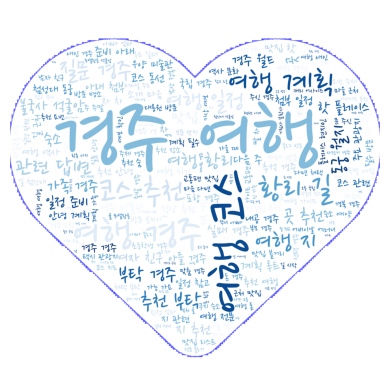

In [84]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
img = Image.open('data/heart.jpg')
mask = np.array(img)

wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    colormap='Blues',
    collocations=True, # 특정단어가 자주 같이 나오면 같이 뿌려 ex 황리길
    max_words=200,
    scale=2, # 이미지 크기의 비율(파일 저장시)
    mask=mask,
    contour_color='blue',
    contour_width=1
).generate(gj_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [85]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/naver_경주.jpg')

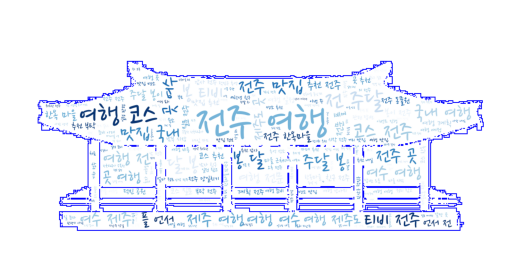

In [86]:
img = Image.open('data/korea-house-black-fill.png')
mask = np.array(img)

wordcloud = WordCloud(
    font_path='data/NanumPenScript-Regular.ttf',
    background_color='white',
    colormap='Blues',
    collocations=True, # 특정단어가 자주 같이 나오면 같이 뿌려 ex 황리길
    max_words=200,
    scale=2, # 이미지 크기의 비율(파일 저장시)
    mask=mask,
    contour_color='blue',
    contour_width=1
).generate(jj_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [87]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/naver_전주.jpg')

## 빈도수 시각화(nltk.Text)

In [88]:
df_gj_noun_list = df_nouns.loc[df_nouns['query']=='경주 여행', 'token'].to_list()
df_jj_noun_list = df_nouns.loc[df_nouns['query']=='전주 여행', 'token'].to_list()

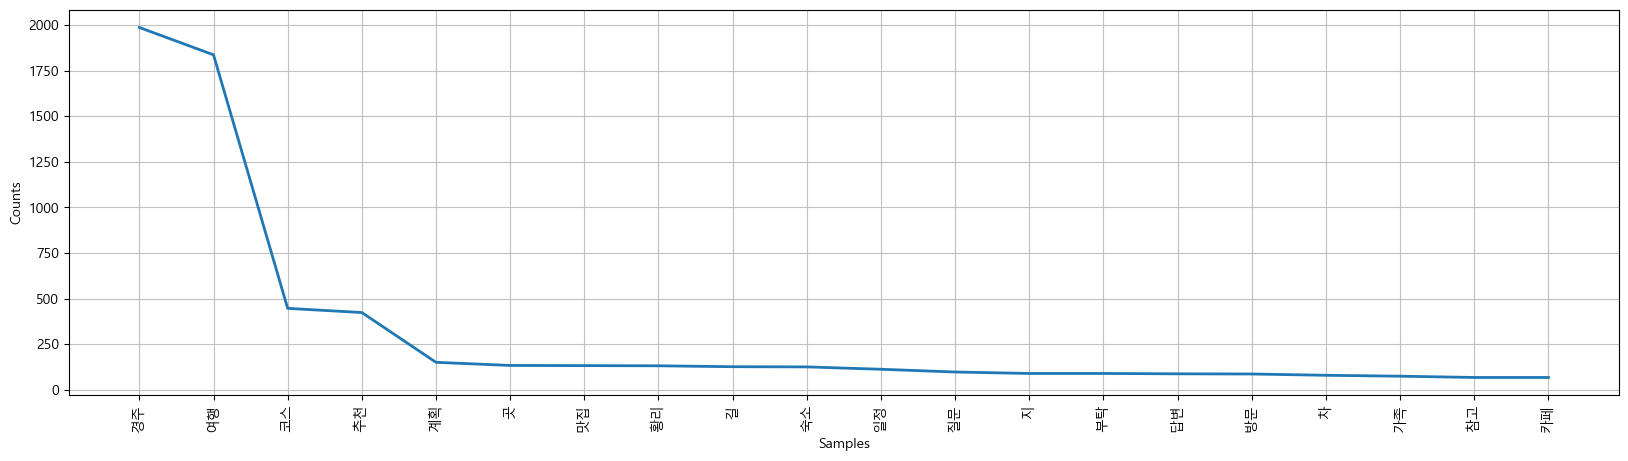

In [89]:
import nltk
data_text = nltk.Text(df_gj_noun_list)
plt.figure(figsize=(20,5))
plt.rc('font', family='Malgun Gothic')
data_text.plot(20)
plt.show()

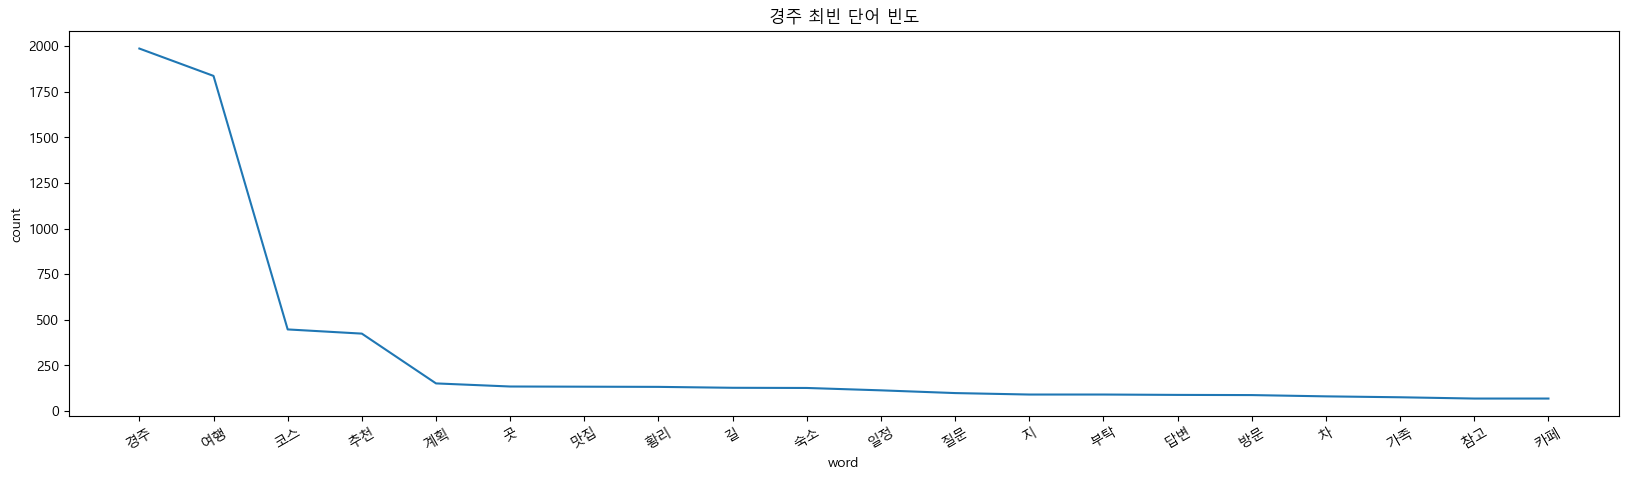

In [92]:
word, counts = zip(*data_text.vocab().most_common(20))
# print(word)
# print(counts)
plt.figure(figsize=(20,5))
plt.plot(word, counts)
plt.xticks(rotation=30)
plt.xlabel('word')
plt.ylabel('count')
plt.title('경주 최빈 단어 빈도')
plt.show()

# 6. 유사도 분석
 - Word2Vec

In [93]:
df = pd.read_csv('data/naver.csv')
df.sample()

,query,no,title,link,description,total_text
433,전주 여행,434,전주 2박3일 여행 비용,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행 전주맛집 국내여행 전주달봉이 달봉티비 전주여행 코스 전주가볼만한곳 여수여...,전주 2박3일 여행 비용 전주여행 전주맛집 국내여행 전주달봉이 달봉티비 전주...


In [94]:
total_text_list = df['total_text'].to_list()
total_text_list[:2]

['25년10월5,6,7일  전주여행   전주여행 가볼만한 곳 추천부탁드립니다 25년 10월 초 전주여행 아이들과 함께 가기 좋은 시점이에요 추석에는 문 연 곳이 적을 수 있지만 전주 한옥마을이나 전주비빔밥 맛집은 추천해용 차는 밀릴 가능성이 높으니 미리 출발하는 ',
 'KTX로 떠나는  전주 여행 , 주요 관광지 도보 이동...   전주 여행 계획 중이시군요 전주역에서 한옥마을까지는 사실 도보로는 좀 멀어요 약 3km 정도 되고 40분 정도 걸립니다 그래서 대부분 택시나 버스를 이용하시는데 택시는 10분 정도면 도착하고 요금도 7 8천원 정도로 부담 없어요 ']

In [95]:
from mecab import MeCab
select_pos = ['NNP', 'NNG']
불용어 = {'여행'}
analyzer = MeCab()
total_noun_list = []
for total_text in total_text_list:
    noun_list = [token for token, tag in analyzer.pos(total_text)
                    if tag in select_pos and
                        token not in 불용어 and
                        len(token)>1]
    total_noun_list.append(noun_list)
print(total_noun_list[:2])

[['전주', '전주', '추천', '부탁', '전주', '아이', '시점', '추석', '전주', '한옥마을', '전주비빔밥', '맛집', '추천', '해용', '가능', '출발'], ['전주', '주요', '관광지', '도보', '이동', '전주', '계획', '주역', '한옥마을', '도보', '정도', '정도', '대부분', '택시', '버스', '이용', '택시', '정도', '도착', '요금', '정도', '부담']]


In [96]:
from gensim.models import Word2Vec
model = Word2Vec(total_noun_list, window=10, min_count=2, workers=-1, 
                 sg=1) # 소량데이터

In [97]:
model.wv.most_similar('전주')

[('식사', 0.3595535457134247),
 ('동선', 0.2897421419620514),
 ('리스트', 0.275379478931427),
 ('덕진구', 0.2731468081474304),
 ('현재', 0.2580290138721466),
 ('가격', 0.2295033037662506),
 ('반려', 0.22023281455039978),
 ('답변', 0.21883943676948547),
 ('한옥마을', 0.21617142856121063),
 ('허락', 0.2135322391986847)]

In [98]:
model.wv.most_similar('경주')

[('호수', 0.3641005754470825),
 ('여름', 0.21867415308952332),
 ('배차', 0.21632219851016998),
 ('경기전', 0.2159893959760666),
 ('인근', 0.21469099819660187),
 ('황동', 0.2134207934141159),
 ('다랭이', 0.20914912223815918),
 ('봉길', 0.20906010270118713),
 ('남편', 0.2070489227771759),
 ('체계', 0.20607852935791016)]

# 연관분석

In [99]:
print(total_noun_list[:2])

[['전주', '전주', '추천', '부탁', '전주', '아이', '시점', '추석', '전주', '한옥마을', '전주비빔밥', '맛집', '추천', '해용', '가능', '출발'], ['전주', '주요', '관광지', '도보', '이동', '전주', '계획', '주역', '한옥마을', '도보', '정도', '정도', '대부분', '택시', '버스', '이용', '택시', '정도', '도착', '요금', '정도', '부담']]


In [100]:
%%time
from apyori import apriori
rules = apriori(total_noun_list, min_support=0.15, min_confidence=0.3, min_lift=1.01)
rules = list(rules)
len(rules)

CPU times: total: 31.2 ms
Wall time: 38.3 ms


125

In [101]:
import pandas as pd
rules_df = pd.DataFrame(None, columns=['lhs', 'rhs', '지지도','신뢰도', '향상도'])
idx = 0
for row in rules:
    support = row[1]
    ordered_st = row[2]
    for item in ordered_st:
        #print(item)
        lhs = item[0]
        lhs = ','.join([x for x in lhs])
        rhs = item[1]
        rhs = ','.join([x for x in rhs])
        confidence = item[2]
        lift = item[3]
        rules_df.loc[idx] = [lhs, rhs, support, confidence, lift]
        idx += 1
#         print("{:10}=>{:16}\t{}\t{}\t{:.2f}".format(lhs, rhs, support, 
#                                                 round(confidence, 2), 
#                                                 lift))
rules_df = rules_df.sort_values(by=['신뢰도', '향상도'], ascending=False)
rules_df.head(20)

,lhs,rhs,지지도,신뢰도,향상도
102,"국내,여수",티비,0.150,1.0,6.060606
132,"국내,주달",티비,0.155,1.0,6.060606
138,"국내,코스",티비,0.155,1.0,6.060606
162,"여수,맛집",티비,0.155,1.0,6.060606
228,"주달,여수",티비,0.155,1.0,6.060606
234,"코스,여수",티비,0.155,1.0,6.060606
307,"국내,여수","티비,맛집",0.150,1.0,6.060606
312,"국내,여수,맛집",티비,0.150,1.0,6.060606
377,"국내,주달","티비,맛집",0.155,1.0,6.060606
382,"국내,주달,맛집",티비,0.155,1.0,6.060606
